# Stats 10 Assignment 2

## Part 1


### Exercise 1
Work with lead and copper data obtained from the residents of Flint, Michigan from January-February, 2017. Data are reported in PPB (parts per billion, or μg/L) from each residential testing kit. Remember that “Pb” denotes lead, and “Cu” denotes copper. You can learn more about the Flint water crisis at https://en.wikipedia.org/wiki/Flint_water_crisis.

[1] 0.04436229
[1] "4.44% of the locations tested were found to have dangerous lead levels."
[1] 44.6424
[1] "The mean copper level for only test sites in the North region is 44.6424010218391."
[1] "The mean copper level for only test sites with dangerous lead levels is 325.454545454545."
[1] 3.383272
[1] 54.58102
[1] "The mean lead level is 3.38327171897782."
[1] "The mean copper level is 54.5810227971719."


[1] 0

[1] "The median lead level is 0."


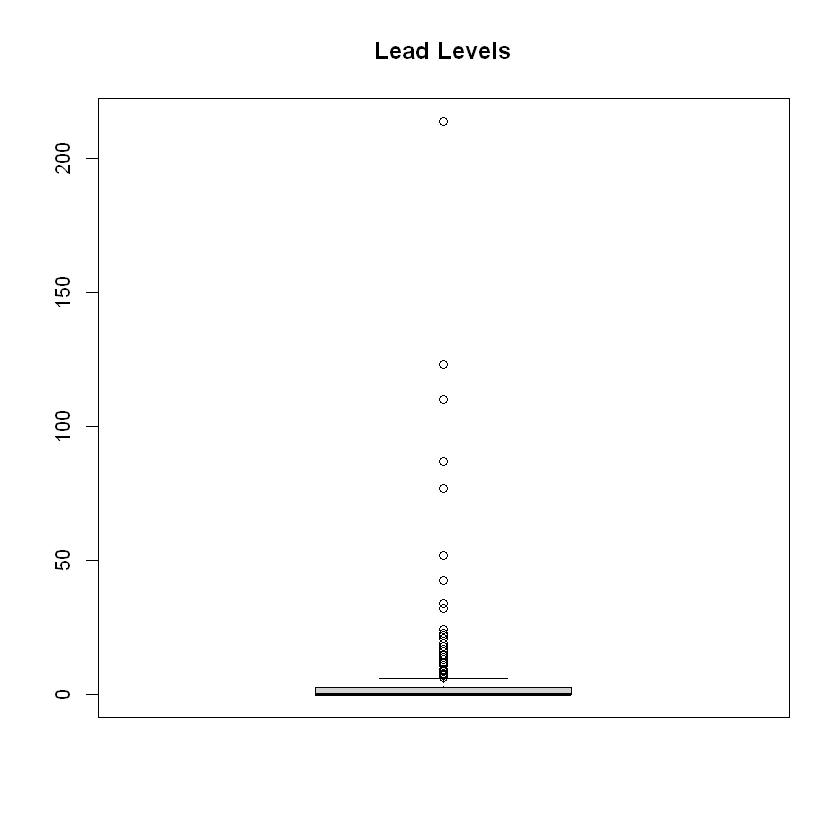

In [1]:
setwd("C:/Users/sanji/Documents/School/Classes/Stats 10/Assignment 2")
# a) Download the data from the course site and read it into R.
flint <- read.csv("./flint.csv")
# b) The EPA states a water source is especially dangerous if the lead level is 15 PPB or greater. What proportion of the locations tested were found to have dangerous lead levels?
dangerous <- flint[flint$Pb >= 15,]
dangerous <- nrow(dangerous)/nrow(flint)
print(dangerous)
print(paste0(round(dangerous*100, 2), "% of the locations tested were found to have dangerous lead levels."))
# c) Report the mean copper level for only test sites in the North region.
north <- flint[flint$Region == "North",]
north <- mean(north$Cu)
print(north)
print(paste0("The mean copper level for only test sites in the North region is ", north, "."))
# d) Report the mean copper level for only test sites with dangerous lead levels (at least 15 PPB)
mean_copper_dangerous <- mean(flint[flint$Pb > 15,]$Cu)
print(paste0("The mean copper level for only test sites with dangerous lead levels is ", mean_copper_dangerous, "."))
# e) Report the mean lead and copper levels.
lead <- mean(flint$Pb)
copper <- mean(flint$Cu)
print(lead)
print(copper)
print(paste0("The mean lead level is ", lead, "."))
print(paste0("The mean copper level is ", copper, "."))
# f) Create a box plot with a good title for the lead levels.
boxplot(flint$Pb, main = "Lead Levels")
# g) Based on what you see in part (f), does the mean seem to be a good measure of center for the data? Report a more useful statistic for this data.
# use median instead of mean
median(flint$Pb)
print (paste0("The median lead level is ", median(flint$Pb), "."))


### Exercise 2
The data here represent life expectancies (Life) and per capita income (Income) in 1974 dollars for 101 countries in the early 1970’s. The source of these data is: Leinhardt and Wasserman (1979), New York Times (September, 28, 1975, p. E-3). They also appear on Regression Analysis by Ashish Sen and Muni Srivastava. You can access these data in R using:

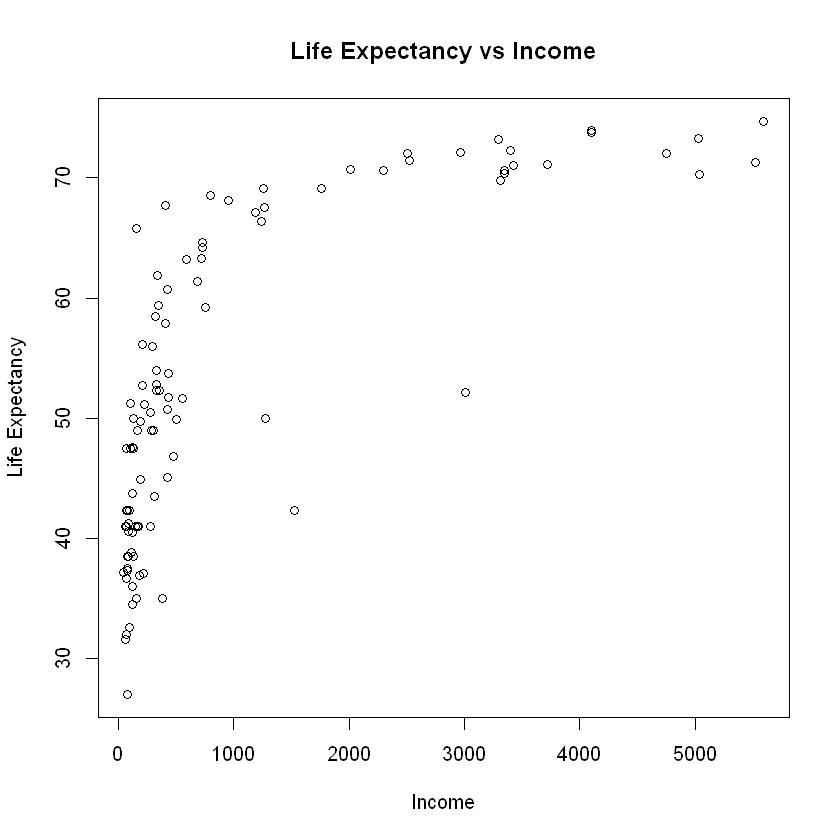

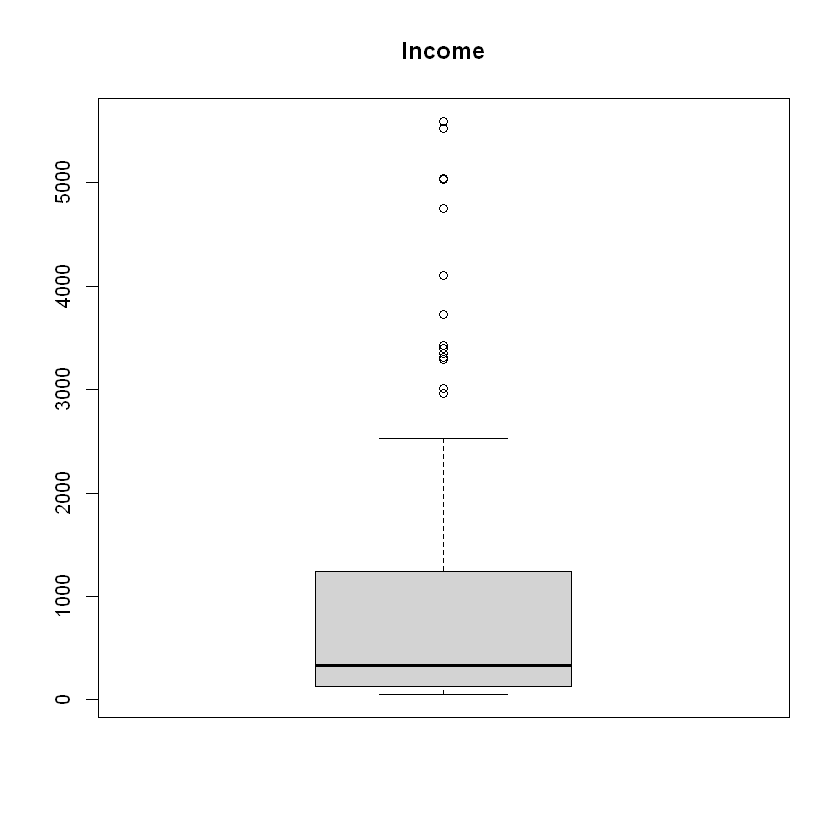

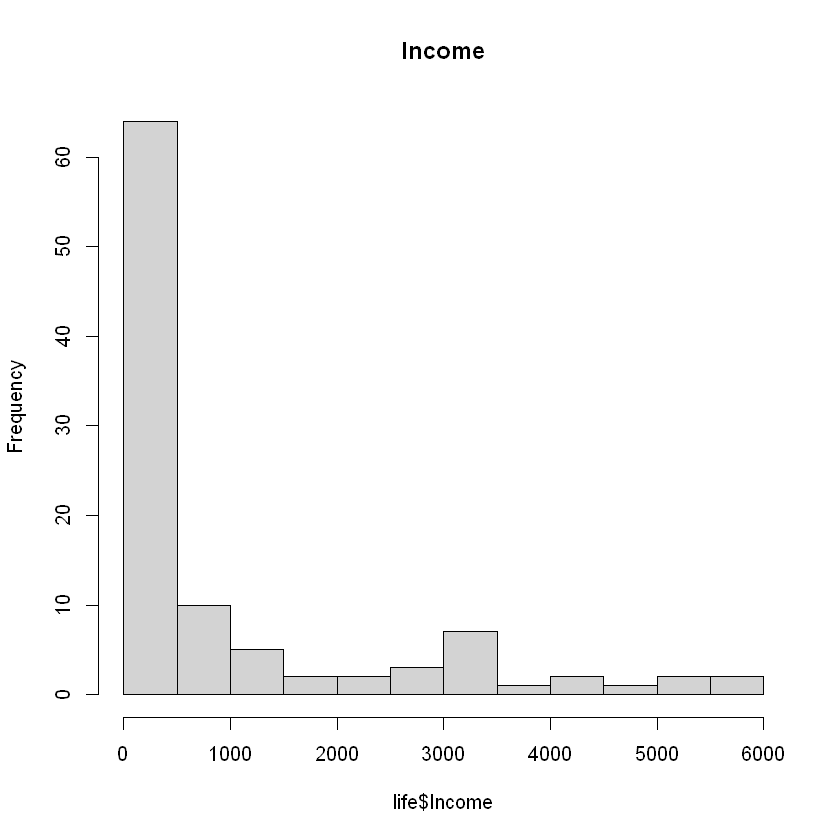

[1] 0.752886

[1] "The correlation coefficient is 0.752886010691135."


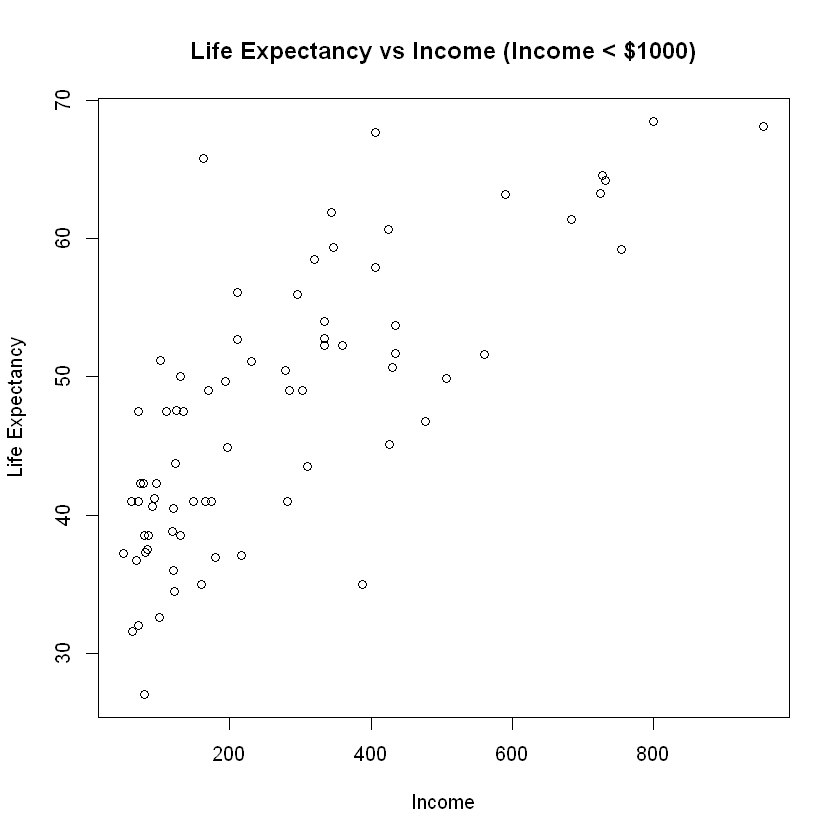

In [2]:
life <- read.table("./countries_life.txt", header = TRUE)
# a) Construct a scatterplot of Life against Income. Note: Income should be on the horizontal axis. How does income appear to affect life expectancy?
plot(life$Income, life$Life, main = "Life Expectancy vs Income", xlab = "Income", ylab = "Life Expectancy")
# b) Construct the boxplot and histogram of Income. Are there any outliers?
boxplot(life$Income, main = "Income")
hist(life$Income, main = "Income")
# c) Split the data set into two parts: One for which the Income is strictly below $1000, and one for which the Income is at least $1000. Come up with your own names for these two objects.
low_income <- life[life$Income < 1000,]
high_income <- life[life$Income >= 1000,]
# d) Use the data for which the Income is below $1000. Plot Life against Income and compute the correlation coefficient. Hint: use the function cor()
plot(low_income$Income, low_income$Life, main = "Life Expectancy vs Income (Income < $1000)", xlab = "Income", ylab = "Life Expectancy")
cor(low_income$Income, low_income$Life)
print(paste0("The correlation coefficient is ", cor(low_income$Income, low_income$Life), "."))


### Exercise 3
The Maas river data contain the concentration of lead and zinc in ppm at 155 locations at the banks of the Maas river in the Netherlands. You can read the data in R as follows:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   37.0    72.5   123.0   153.4   207.0   654.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  113.0   198.0   326.0   469.7   674.5  1839.0 

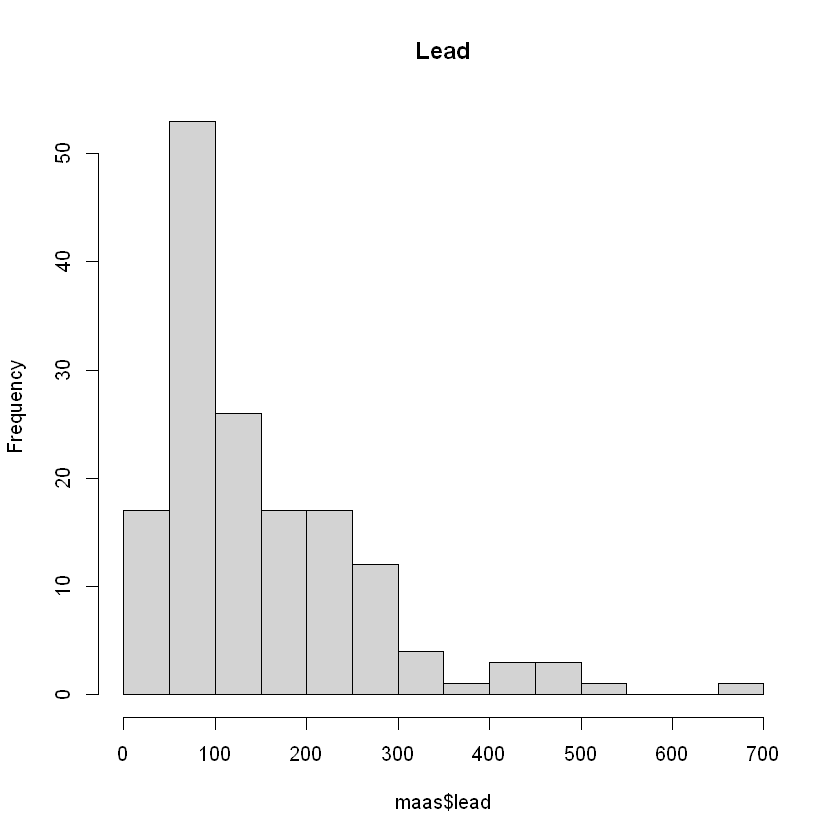

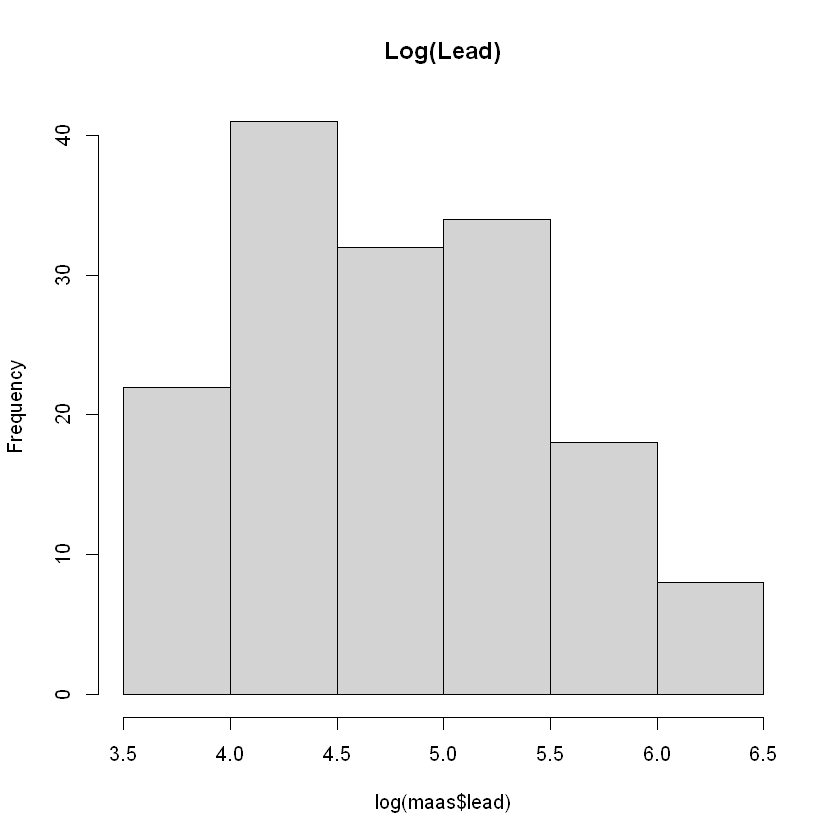

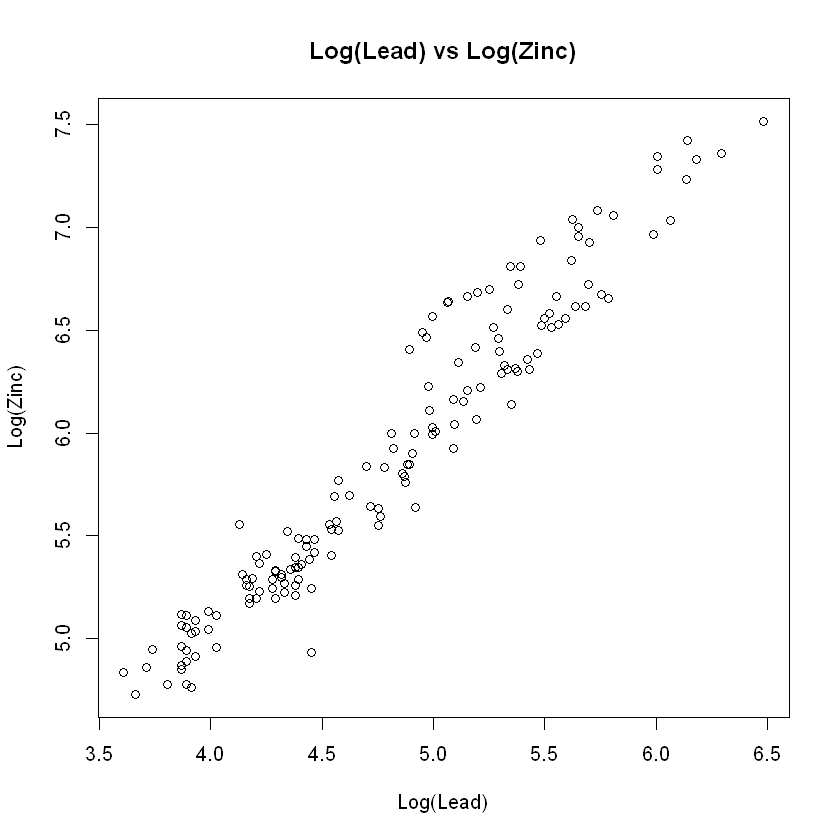

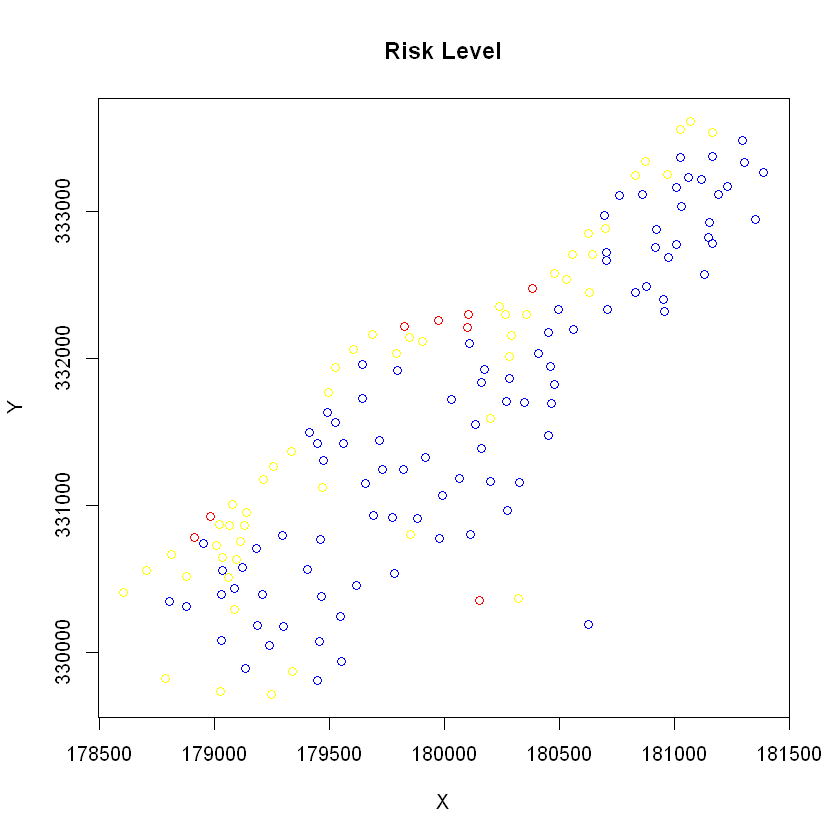

In [3]:
maas <- read.table("./soil.txt", header = TRUE)
# a) Compute the summary statistics for lead and zinc using the summary() function.
summary(maas$lead)
summary(maas$zinc)
# b) Plot two histograms: one of lead and one of log(lead).
hist(maas$lead, main = "Lead")
hist(log(maas$lead), main = "Log(Lead)")
# c) Plot log(lead) against log(zinc). What do you observe?
plot(log(maas$lead), log(maas$zinc), main = "Log(Lead) vs Log(Zinc)", xlab = "Log(Lead)", ylab = "Log(Zinc)")
# d) The level of risk for surface soil based on lead concentration in ppm is given on the table below:
# Mean concentration (ppm) | Level of risk
# Below 150 | Lead-free
# Between 150-400 | Lead-safe
# Above 400 | Significant environmental lead hazard
colors <- c("blue", "yellow", "red")
levels <- cut(maas$lead, breaks = c(0, 150, 400, Inf), labels = c("Lead-free", "Lead-safe", "Significant environmental lead hazard"))
plot(maas$x, maas$y, col = colors[levels], main = "Risk Level", xlab = "X", ylab = "Y")


### Exercise 4
The data for this exercise represent approximately the centers (given by longitude and latitude) of each one of the City of Los Angeles neighborhoods. See also the Los Angeles Times project on the City of Los Angeles neighborhoods at: http://projects.latimes.com/mapping-la/neighborhoods/. 



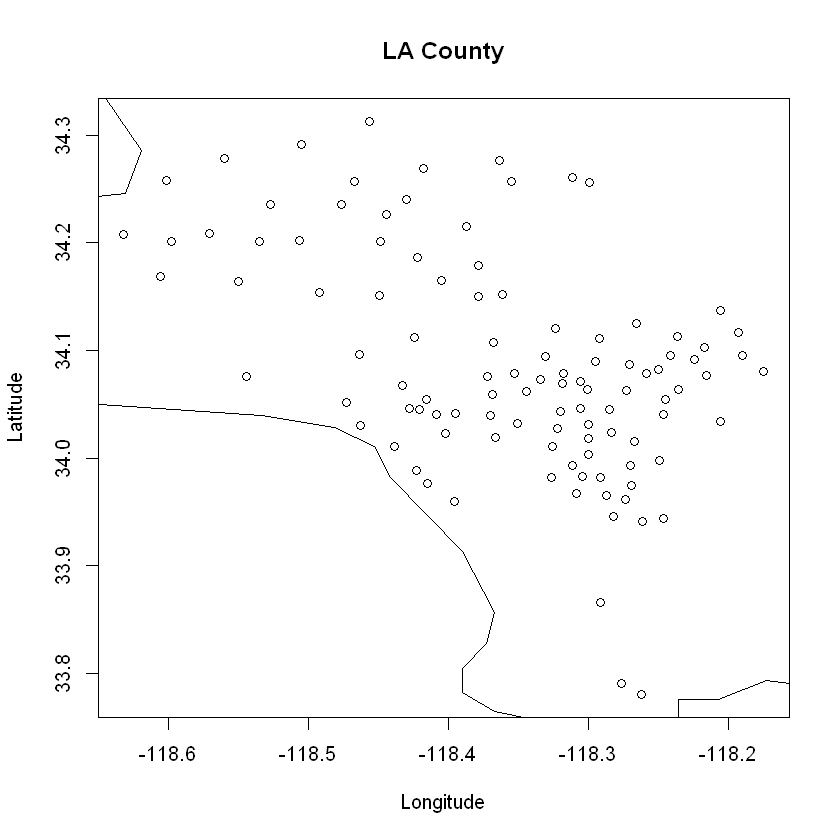

[1] "There seems to be a positive correlation between income and school performance."


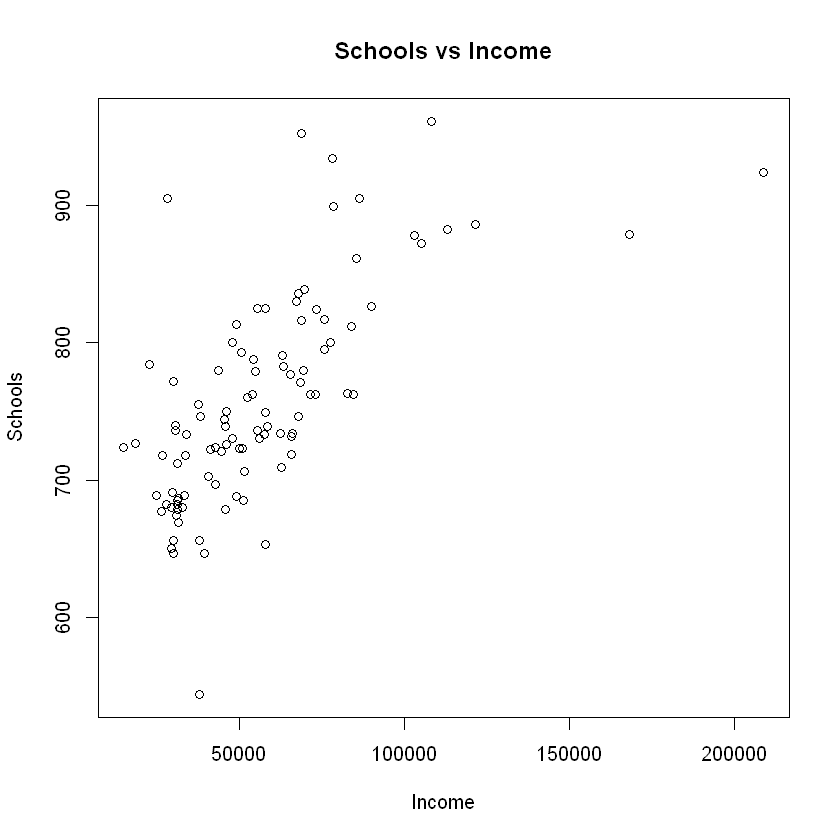

In [4]:
LA <- read.table("./la_data.txt", header = TRUE)
library(maps)
# a) Plot the data point locations. Use good formatting for the axes and title. Then add the outline of LA County by typing:
plot(LA$Longitude, LA$Latitude, main = "LA County", xlab = "Longitude", ylab = "Latitude")
map("county", "california", add = TRUE)
# b) Do you see any relationship between income and school performance? Hint: Plot the variable Schools against the variable Income and describe what you see. Ignore the data points on the plot for which Schools = 0. Use what you learned about subsetting with logical statements to first create the objects you need for the scatter plot. Then, create the scatter plot. Alternate methods may only receive half credit.
schools <- LA[LA$Schools > 0,]
plot(schools$Income, schools$Schools, main = "Schools vs Income", xlab = "Income", ylab = "Schools")
print(paste0("There seems to be a positive correlation between income and school performance."))

                


### Exercise 5
In this exercise, you will work with a dataset containing information about customers of a retail store.    
The dataset includes the following variables:
1. Customer ID: unique identifier for each customer
2. Age: age of the customer in years
3. Gender: gender of the customer (M for male, F for female)
4. Income: annual income of the customer in dollars
5. Education: education level of the customer (high school, some college, college degree, graduate degree)
6. Marital status: marital status of the customer (single, married, divorced, widowed)
7. Purchase amount: the total amount the customer spent at the store in the past year

[1] 22

[1] "There are 22 missing values in the dataset."
'data.frame':	100 obs. of  7 variables:
 $ cust_id       : chr  "CUST1" "CUST2" "CUST3" "CUST4" ...
 $ age           : int  48 32 68 31 20 59 67 NA 54 69 ...
 $ gender        : chr  "M" "M" "F" "F" ...
 $ income        : int  73801 NA 198808 154535 116852 65761 NA 121061 37095 95555 ...
 $ education     : chr  "high school" "college degree" "some college" "graduate degree" ...
 $ marital_status: chr  "divorced" "widowed" "married" "widowed" ...
 $ purchase_amt  : int  164 108 354 440 110 471 NA 341 422 72 ...
[1] "The data type of each variable is as follows: cust_id (character), The data type of each variable is as follows: age (integer), The data type of each variable is as follows: gender (character), The data type of each variable is as follows: income (integer), The data type of each variable is as follows: education (character), The data type of each variable is as follows: marital_status (character), The data type of each variabl

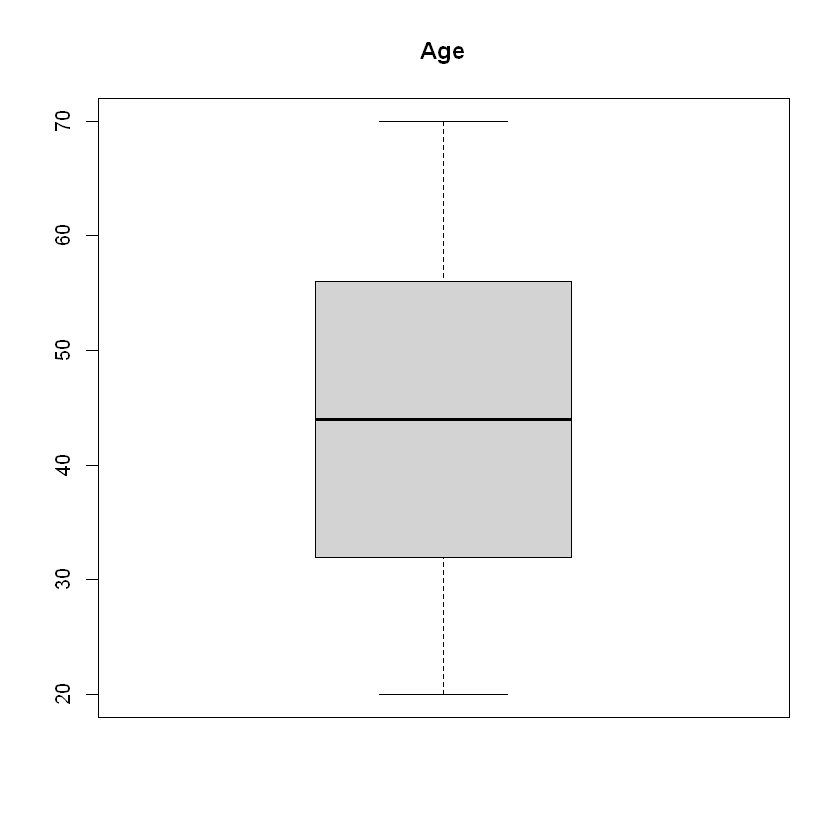

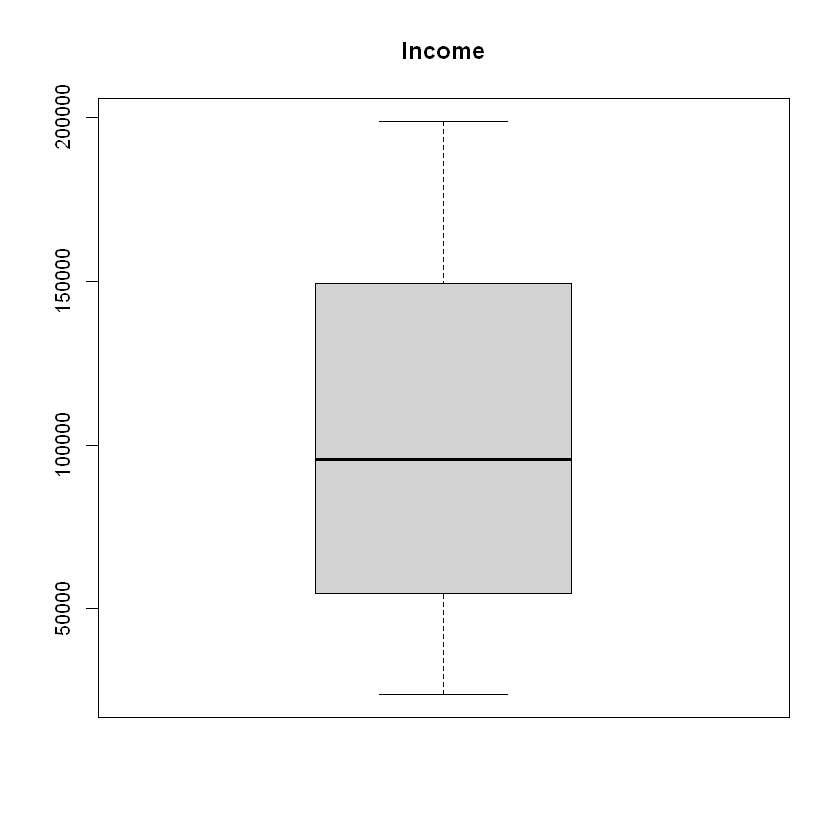

[1] "There do not appear to be any outliers in any of the variables."
[1] "This can be seen through the box plots, since there are no outliers shown."


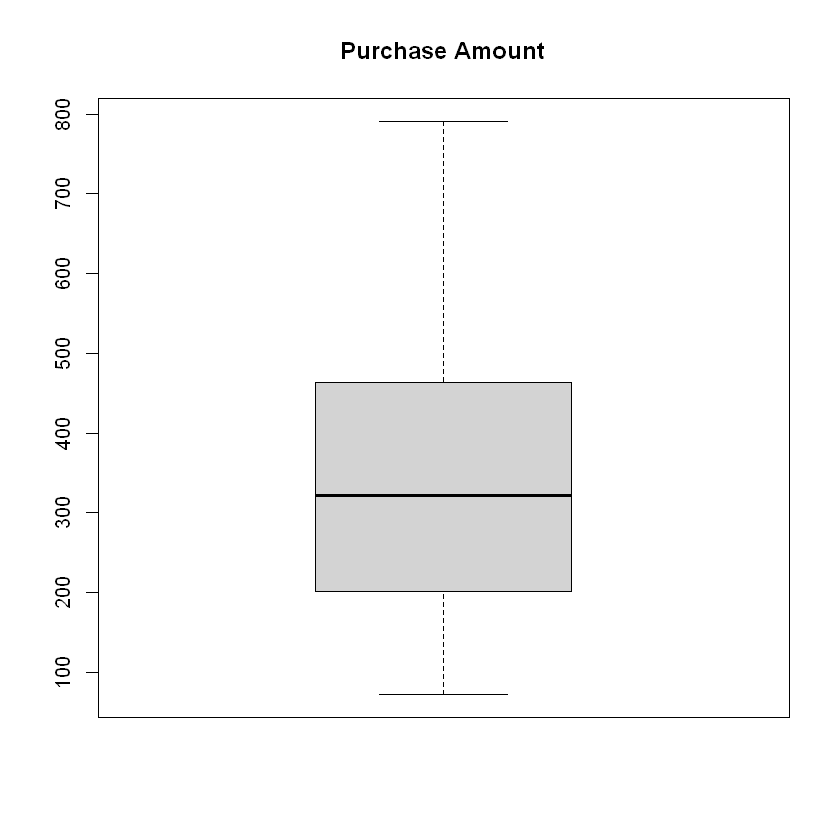

In [5]:
customer_data = read.csv("./customer_data.csv")
# a) Are there any missing values in the dataset? If so, how many are there and which variables have missing values?
sum(is.na(customer_data))
print(paste0("There are ", sum(is.na(customer_data)), " missing values in the dataset."))
# b) What is the data type of each variable? Are there any variables that should be converted to a different data type?
str(customer_data)
print(paste0("The data type of each variable is as follows: ", paste0(names(customer_data), " (", sapply(customer_data, class), ")"), collapse = ", "))
# c) Do any numerical variables have outliers or extreme values? If so, how would you handle them? Provide your analysis in R for identifying outliers (e.g., visualization, numerical summary statistics). This is an open-ended question, so please feel free to use any appropriate methods to identify and deal with any outliers or extreme values in the dataset.
# first we need to remove the categorical variables
customer_data_num <- customer_data[, sapply(customer_data, is.numeric)]
# remove the NA values
customer_data_num <- customer_data_num[complete.cases(customer_data_num),]
# boxplot
boxplot(customer_data_num$age, main = "Age")
boxplot(customer_data_num$income, main = "Income")
boxplot(customer_data_num$purchase_amt, main = "Purchase Amount")
print(paste0("There do not appear to be any outliers in any of the variables."))
print(paste0("This can be seen through the box plots, since there are no outliers shown."))


## Part II

### Exercise I
A study was done random sample of 900 college students. The researcher wants to find out if gender would affect people’s body image. The two-way table below summarizes the two variables.
| Table | About right | Overweight | Underweight | Total |
|-------|-------------|------------|-------------|-------|
| Female  | 310         | 130        | 30          | 470   |
| Male| 290         | 68         | 72          |   430 |
| Total |             |            |             | 900   |

a) In general, are students happy with their body weight? (Hint: Students that are happy with their body weight responded "about right.")

(310 + 290)/ 900 students said that they are happy with their body weight. This is 600/900 or 66.67% of the students. This means that in general students are happy with their body weight.


b) If the researcher wants to compare the differences in body image between females and males. What graph would best visualize the data for this purpose? Explain. (No need to draw the actually plot)

A pie chart would be the best way to visualize the data. This is because the data is categorical and the pie chart would show the proportion of each category. A stacked bar chart would also work, since that would also highlight the relative proportions of each category.

c) Are female students more likely to feel they are about right than male students? Explain with numerical evidence.
Probability of male student feeling about right: 290/430 ~= 67.5%
Probability of female student feeling about right: 310/470 ~= 66.0%

Based on this it is more likely that male students feel about right than female students.

d) For students who do not feel ‘about right’ with their body image, are there any differences between the two gender groups? (Hint: are they more likely to feel there are overweight or underweight? Do female students and male students feel the same way?)

Probability that a male student who is does not feel about right feels overweight: 68/140 ~=49%.
Probability that a female student who is does not feel about right feels overweight: 130/160 ~=81%.

Therefore from this, female students who are not happy with their body image are more likely to classify themselves as overweight.






### Exercise II
For each of the scatterplots shown, provide a written description that includes the direction, form, and strength of the relationship, along with any outliers that do not fit the general trend. In addition, explain what these characteristics mean in the context of the data.

a) Data on 50 states taken from the U.S. Census shows how the median family income is related to the population (25 years or older) with a college degree or higher.

This has a medium strength positive trend. There is one outlier at 30%, where the median family income is $60,000. This data shows that there is a medium correlation in the median income of a state with the % of the population with a BA degree.

b) Consider the relationship between the average amount of fuel used (in liters) to drive a fixed distance in a car (100 km), and the speed at which the car is driven (in km per hour).

This data does not have a linear trend, but seems to have a quadratic trend. The correlation seems to be high and there are no outliers. Based on this data it seems that fuel used is lowest around 60 mph. When you go faster, the fuel used increases, but when you go slower, the fuel used also increases(more than when you go faster).

### Exercise III
A researcher collected data on the median starting salaries and the median mid-career salaries for graduates at a selection of colleges. (Source: The Wall Street Journal, Salary increase by salary type, https://www.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Type-sort.html). The data points and the fitted least squares regression line are displayed in the graph below.

a) What is the explanatory variable and what is the response variable?

The explanatory variable is the start median salary, and the response variable is mid career median salary.

b) And why do you think the median salary is used instead of the mean?

The median salary is used instead of the mean, since the mean salary is more likely to be skewed by outliers. Therefore the median salary is more representative of the typical salary.

c) Can the median mid-career salary be estimated given a median starting salary of 60 (in thousands of dollars)? Please explain why or why not, and show your calculation and explanation if possible.

Yes, it can be estimated since there is a strong positive linear relationship between the two variables. The estimated mid career salary would be  60*1.989 - 7.699 = 111.64 (in thousands of dollars).

d) Can the median mid-career salary be estimated given a median starting salary of 100 (in thousands of dollars)? Please explain why or why not, and show your calculation and explanation if possible.

It is not possible to accurately estimate the mid career salary given a median starting salary of 100, since the starting salary is outside the range of the data. However, if we were to extrapolate, the estimated mid career salary would be 100*1.989 - 7.699 = 191.301 (in thousands of dollars).



### Exercise IV:
Assume that the relationship between the calories in a five-ounce serving and the % alcohol content for a sample of wines is linear. Use the % alcohol as the explanatory variable, and fit a least squares regression line.

a) Slope = 0.95*(46.34/2.32) = 18.98

Intercept = 141.67 - 18.98*11.03 = -67.6794

b) calories = 18.98 * % alcohol - 67.6794

When you increase the percent alcohol by 1%, the calories increase by 18.98.
When the % alcohol is 0 the calories are -67.6794. This does not make sense since the calories cannot be negative.

c) Find and interpret the value of the coefficient of determination.

The coefficient of determination is 0.95^2 = 0.9025. This means that 90.25% of the variation in calories can be explained by the variation in % alcohol.

d)Suppose a new point was added to your data: a wine that is 20% alcohol that contains 0 calories. How will that affect the value of r and the slope of the regression line? (No calculation needed).

That would decrease the value of r, since it would be an outlier. The slope of the regression line would also decrease, since the variance would increase, therefore the slope would decrease.


### Exercise V:
A doctor who believes strongly that antidepressants work better than "talk therapy" tests depressed patients by treating half of them with antidepressants and the other half with talk therapy. The doctor recruited 100 patients for the study. After six months’ treatment, the patients will be evaluated on a scale of 1 to 5, with 5 indicating the greatest improvement. The doctor is designing the study plan.


a) The doctor wants to put the most severe patients in the antidepressants group because he is concerned about those patients’ conditions. Will this affect his ability to compare the effectiveness of the antidepressants and the “talk therapy”? Explain. 

This will affect his ability to compare the effectiveness of the antidepressants since the grouping is not made random.


b) The doctor asks you whether it is acceptable for him to know which treatment each patient receives. Explain why this practice may affect his ability to compare the two groups.

This will affect his ability to compare the two groups since he will be biased in his evaluation of the patients. He will be more likely to rate the patients who received antidepressants higher than the patients who received talk therapy(or vice versa).


c) What improvements to the plan would you recommend?
I would recommend that the doctor randomly assign the patients to the two groups. I would also recommend that the doctor not know which treatment each patient receives, the only way to do this is to have another doctor evaluate the patients who does not know which treatment each patient received, or to have the patients self evaluate themselves while taking the drug or placebo.
